In [1]:
from resources.network import Network
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
model = Network()
model.load_state_dict(torch.load("state_dict_model-Run(lr=0.01, batch_size=1000, shuffle=True, device='cuda').pt", weights_only=True))
model.eval()

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [3]:
test_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=False
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [92]:
display_loader = torch.utils.data.DataLoader(
    test_set, batch_size=10, shuffle=True)

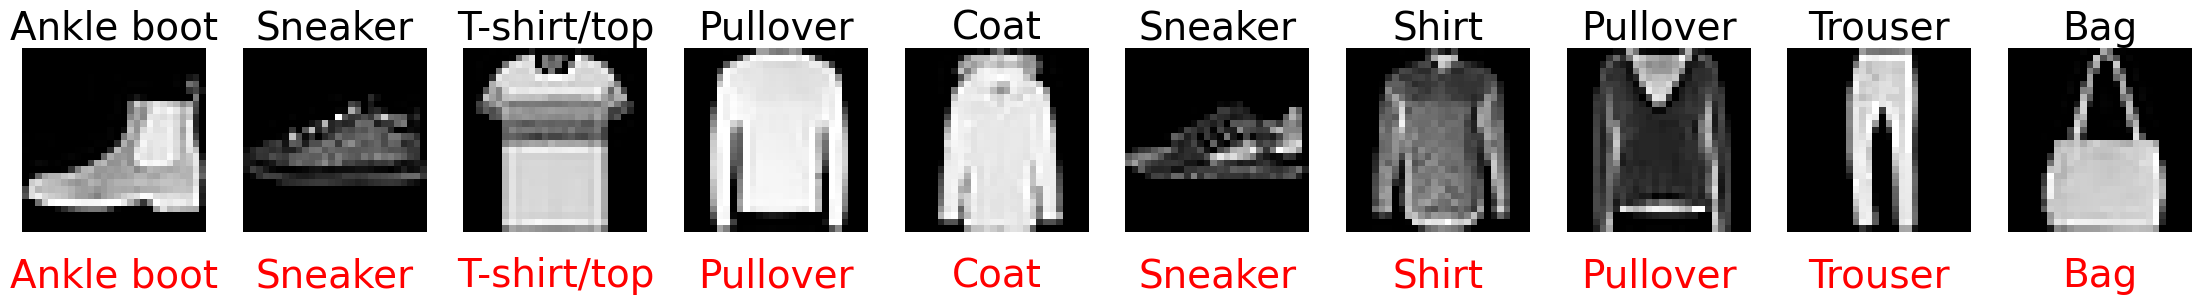

In [178]:
plt.figure(figsize=(28,28))
batch = next(iter(display_loader))
images, labels = batch
pred = model(images)
output = pred.argmax(dim=1)
for x in range(0, len(images)):
    image = images[x]
    label = labels[x]               
    ax = plt.subplot(1,10,x+1)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(test_set.classes[label.item()], fontsize=28)
    plt.text(0.5,-0.3,test_set.classes[output[x].item()], fontsize=28,color='red',ha='center',transform=ax.transAxes)
plt.show()